<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 بخش سوم: تحلیل‌های آماری
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، به کمک دانش آماری می‌خواهیم به تعدادی از سوال‌ها پاسخ دهیم؛ برخی از سوالات برای درک و یافتن شهود از داده‌ها پرسیده شده است، برخی دیگر از سمت یک شخص خاص، و در انتها تعدادی فرضیه مطرح شده است که شما باید آن‌ها را اعتبارسنجی کنید.

</font>
</p>

In [41]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sqlalchemy as db
from sqlalchemy import create_engine, select, Column, Integer, String, Float, MetaData, Table
from sqlalchemy.orm import sessionmaker
import os
import random
from scipy import stats
from sqlalchemy import func
from sqlalchemy import bindparam

In [42]:
USERNAME = 'root'
PASSWORD = 'YOUR PASSWORD'
HOST = '127.0.0.1'
PORT = 3306
DATABASE = 'database2'
engine = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}', echo=True)

In [43]:
Session = sessionmaker(bind=engine)
session = Session()
metadata = MetaData()

<h2 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آمار توصیفی
</font>
</h2>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سوال ۱
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ارتباط میان ارزش بازار (Market Cap) و حجم معاملاتی روزانه (Volume 24h) رمزارزها را بررسی نمایید. برای این کار می‌توانید Scatter Plot آن را رسم کنید. 
</font>
</p>

In [44]:
Session = sessionmaker(bind=engine)
session = Session()
metadata = MetaData()
MainDB = Table('FinalMain', metadata, autoload_with=engine)


2023-09-11 22:17:37,805 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-09-11 22:17:37,806 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 22:17:37,807 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-09-11 22:17:37,808 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 22:17:37,808 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-09-11 22:17:37,809 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 22:17:37,810 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-11 22:17:37,811 INFO sqlalchemy.engine.Engine SHOW CREATE TABLE `FinalMain`
2023-09-11 22:17:37,811 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 22:17:37,820 INFO sqlalchemy.engine.Engine ROLLBACK


In [45]:
query = select((MainDB.c.Market_Cap))
with engine.connect() as conn:
    result = conn.execute(query)
#result  = engine.execute(query)  for older version

2023-09-11 22:17:39,942 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-11 22:17:39,944 INFO sqlalchemy.engine.Engine SELECT `FinalMain`.`Market_Cap` 
FROM `FinalMain`
2023-09-11 22:17:39,945 INFO sqlalchemy.engine.Engine [generated in 0.00328s] {}
2023-09-11 22:17:39,949 INFO sqlalchemy.engine.Engine ROLLBACK


In [46]:
Market_caps = []
for row in result:
    money_str = row[0] 
    #money_str = money_str.replace('$', '').replace(',', '')
    money_float = float(money_str)
    Market_caps.append(money_float)

#print(len(Market_caps))

In [47]:
volume24hs = []
query = select((MainDB.c.volume24h))
with engine.connect() as conn:
    result = conn.execute(query)
#result  = engine.execute(query)  for older version
for row in result:
    volume_str = row[0] 
    #volume_str = volume_str.replace('$', '').replace(',', '')
    volume_str = float(volume_str)
    volume24hs.append(volume_str)

2023-09-11 22:17:43,270 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-11 22:17:43,272 INFO sqlalchemy.engine.Engine SELECT `FinalMain`.volume24h 
FROM `FinalMain`
2023-09-11 22:17:43,272 INFO sqlalchemy.engine.Engine [generated in 0.00251s] {}
2023-09-11 22:17:43,276 INFO sqlalchemy.engine.Engine ROLLBACK


In [48]:
print(Market_caps)
print(volume24hs)

[507090156466.71, 198709982386.16, 82807252662.66, 33590478887.3, 27845876512.16, 25919090832.39, 9152956074.04, 8878470592.73, 8318053764.65, 6900049920.05, 5458384818.16, 5347822079.04, 5090241628.57, 4897461704.62, 4790996215.75, 4796905977.53, 4243855522.84, 3742379987.32, 3565997081.68, 3459082269.77, 3395969321.15, 3232593123.9, 3153614715.61, 2906332785.19, 2627527906.85, 2563461708.97, 2560000113.73, 2510937180.9, 2282733161.55, 1947264958.07, 1551766082.28, 1434049850.09, 1389503504.21, 1383021589.59, 1294165405.57, 1293223853.59, 1224514289.72, 1208723808.64, 1167316310.31, 1120314403.12, 1052692332.09, 990504480.61, 826232881.8, 816867738.33, 758703967.47, 733226989.17, 723638753.88, 683752252.2, 666749800.85, 661943435.76, 660397460.79, 655307121.86, 645857673.66, 635749025.28, 632186784.21, 608735271.0, 582258459.46, 579354449.45, 578069048.78, 555024528.45, 548179027.6, 533029166.23, 509987125.72, 506141678.92, 504043588.86, 491529841.24, 474111896.22, 472618561.86, 46809

Text(0.5, 1.0, 'MarketCap Vs Volume')

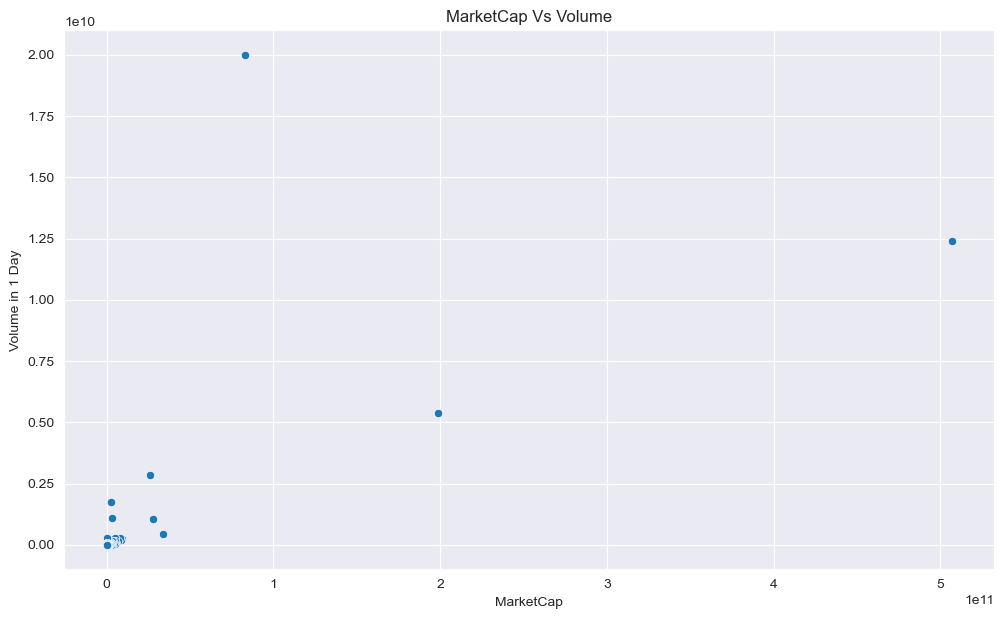

In [49]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))
sns.scatterplot(x=Market_caps , y=volume24hs)
plt.xlabel("MarketCap")
plt.ylabel("Volume in 1 Day")
plt.title("MarketCap Vs Volume")

In [77]:
Market_caps2 = pd.Series(Market_caps)
volume24hs2 = pd.Series(volume24hs)
data = pd.DataFrame({'Market_caps': Market_caps2, 
                     'volume24hs': volume24hs2})
data

,Market_caps,volume24hs
0,5.070902e+11,1.240605e+10
1,1.987100e+11,5.396998e+09
2,8.280725e+10,1.999915e+10
3,3.359048e+10,4.238911e+08
4,2.784588e+10,1.067427e+09
...,...,...
195,8.694037e+07,5.954212e+06
196,8.699604e+07,1.388173e+06
197,8.686144e+07,2.124704e+06
198,8.385306e+07,1.634389e+06


In [78]:
data = data[ data['Market_caps'] < 1000000000]


Text(0.5, 1.0, 'MarketCap Vs Volume')

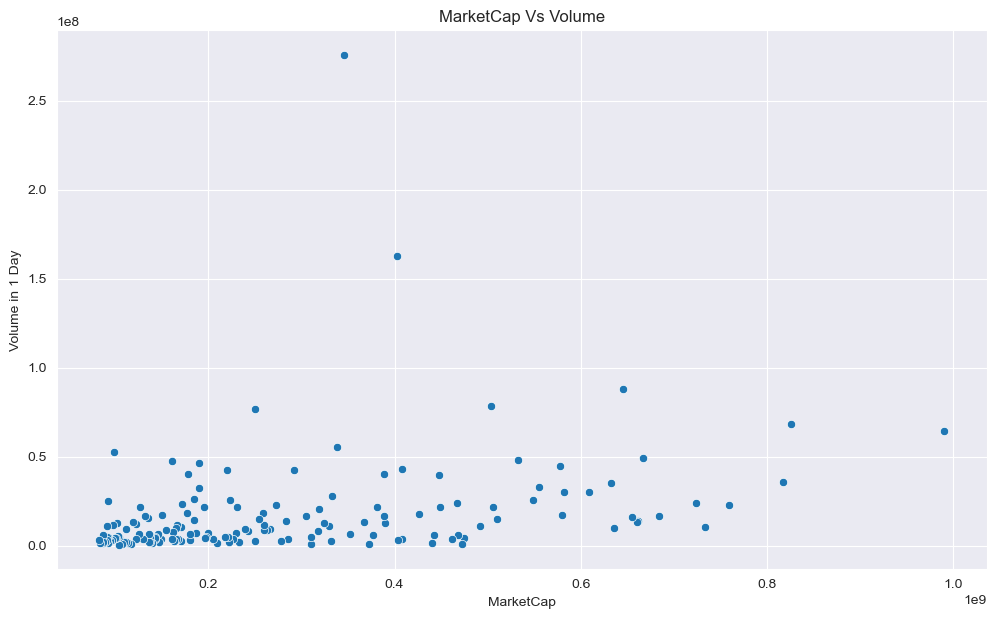

In [79]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))
sns.scatterplot(x = data['Market_caps'], y = data['volume24hs'])
plt.xlabel("MarketCap")
plt.ylabel("Volume in 1 Day")
plt.title("MarketCap Vs Volume")

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سوال ۲
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین با اطلاعات بیش از ۴۰هزار شهر در قالب یک دیتافریم مواجه می‌شوید و با در یک سال اخیر کدام جفت‌رمزارزها بیشترین روزها با تغییر قیمت هم‌سو را تجربه کرده‌اند و چند روز؟ (منظور از تغییر قیمت همسو افزایش قیمت هر دو رمز ارز یا کاهش قیمت جفت‌شان طی یک روز است) ۳۰ جفت رمزارز برتر را نخست به ترتیب تعداد روز همسو، سپس نام رمز ارز اول و در نهایت نام رمز ارز دوم نمایش دهید؛ همچنین توجه داشته باشید همواره نام رمزارز اول از نظر حروف الفبا مقدم بر نام رمز ارز دوم باشد. 
</font>
</p>

In [10]:
conn = engine.connect()
metadata = db.MetaData()

In [11]:
sql = "select * from FinalMain"
testDf = pd.DataFrame(conn.execute(db.text(sql)))
#testDf.head()

2023-09-11 13:12:56,626 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-11 13:12:56,627 INFO sqlalchemy.engine.Engine select * from FinalMain
2023-09-11 13:12:56,628 INFO sqlalchemy.engine.Engine [generated in 0.00259s] {}


In [12]:
sql = "select distinct CombinedCSV.name from CombinedCSV"
names = pd.DataFrame(conn.execute(db.text(sql)))
#names.head()

2023-09-11 13:12:57,816 INFO sqlalchemy.engine.Engine select distinct CombinedCSV.name from CombinedCSV
2023-09-11 13:12:57,817 INFO sqlalchemy.engine.Engine [generated in 0.00080s] {}


In [13]:
coins = []
for name in names['name']:
    sql = "select * from CombinedCSV where CombinedCSV.name = \"" + name + "\"";
    coin = pd.DataFrame(conn.execute(db.text(sql)))
    coins.append(coin)

2023-09-11 13:12:59,086 INFO sqlalchemy.engine.Engine select * from CombinedCSV where CombinedCSV.name = "0x Protocol"
2023-09-11 13:12:59,087 INFO sqlalchemy.engine.Engine [generated in 0.00099s] {}
2023-09-11 13:12:59,140 INFO sqlalchemy.engine.Engine select * from CombinedCSV where CombinedCSV.name = "1inch Network"
2023-09-11 13:12:59,141 INFO sqlalchemy.engine.Engine [generated in 0.00051s] {}
2023-09-11 13:12:59,181 INFO sqlalchemy.engine.Engine select * from CombinedCSV where CombinedCSV.name = "Aave"
2023-09-11 13:12:59,182 INFO sqlalchemy.engine.Engine [generated in 0.00070s] {}
2023-09-11 13:12:59,219 INFO sqlalchemy.engine.Engine select * from CombinedCSV where CombinedCSV.name = "aelf"
2023-09-11 13:12:59,219 INFO sqlalchemy.engine.Engine [generated in 0.00044s] {}
2023-09-11 13:12:59,253 INFO sqlalchemy.engine.Engine select * from CombinedCSV where CombinedCSV.name = "Akash Network"
2023-09-11 13:12:59,254 INFO sqlalchemy.engine.Engine [generated in 0.00036s] {}
2023-09-11

In [14]:
'''directory = 'top200'
coins = []

for filename in os.scandir(directory):
    if(filename.is_file() and Path(filename).suffix in ['.csv']):
        df = pd.read_csv(filename, sep=';', parse_dates=[1,2,3,4,11])
        coins.append(df)'''

"directory = 'top200'\ncoins = []\n\nfor filename in os.scandir(directory):\n    if(filename.is_file() and Path(filename).suffix in ['.csv']):\n        df = pd.read_csv(filename, sep=';', parse_dates=[1,2,3,4,11])\n        coins.append(df)"

In [15]:
coins[0].head()

,index,Name,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,0,0x Protocol,2023-09-01T00:00:00.000Z,2023-09-01T23:59:59.999Z,2023-09-01T00:50:00.000Z,2023-09-01T17:43:00.000Z,0.165031,0.166129,0.160861,0.162285,5871295.09,1.375358e+08,2023-09-01T23:59:59.999Z
1,1,0x Protocol,2023-08-31T00:00:00.000Z,2023-08-31T23:59:59.999Z,2023-08-31T11:59:00.000Z,2023-08-31T21:10:00.000Z,0.173477,0.173825,0.163603,0.165032,8818782.31,1.398643e+08,2023-08-31T23:59:59.999Z
2,2,0x Protocol,2023-08-30T00:00:00.000Z,2023-08-30T23:59:59.999Z,2023-08-30T00:04:00.000Z,2023-08-30T18:35:00.000Z,0.179006,0.179208,0.172838,0.173472,5742333.46,1.470167e+08,2023-08-30T23:59:59.999Z
3,3,0x Protocol,2023-08-29T00:00:00.000Z,2023-08-29T23:59:59.999Z,2023-08-29T17:37:00.000Z,2023-08-29T10:40:00.000Z,0.171287,0.179883,0.166246,0.179005,8196429.59,1.517058e+08,2023-08-29T23:59:59.999Z
4,4,0x Protocol,2023-08-28T00:00:00.000Z,2023-08-28T23:59:59.999Z,2023-08-28T03:01:00.000Z,2023-08-28T08:41:00.000Z,0.171732,0.173390,0.167069,0.171301,8435254.17,1.451768e+08,2023-08-28T23:59:59.999Z


In [16]:
num_coins = len(coins)
top_related_coins = np.zeros((31,3))
for i in range(num_coins):
    dif1 = coins[i]['close'] - coins[i]['open']
    
    for j in range(i + 1, num_coins):
        dif2 = coins[j]['close'] - coins[j]['open']
        num_cons_days = 0
        max_num_days = 0
        #print(coins[i]['Name'][0], coins[j]['Name'][0])
        #print(len(dif1), len(dif2))
        for k in range(min(len(dif1), len(dif2))):
            if(dif1[k] * dif2[k] >= 0):
                num_cons_days += 1
            else:
                num_cons_days = 0
            max_num_days = max(max_num_days, num_cons_days)
        
        #print(np.array([max_num_days, i, j]))        
        top_related_coins[0] = np.array([max_num_days, i, j])
        #print(top_related_coins)
        top_related_coins = top_related_coins[top_related_coins[:,0].argsort(kind='mergesort')]
        #print(top_related_coins)

In [17]:
#print(top_related_coins)
for i in range(30, 0, -1):
    coin1 = coins[int(top_related_coins[i][1])]['Name'][0]
    coin2 = coins[int(top_related_coins[i][2])]['Name'][0]
    cnt = top_related_coins[i][0]
    print('Coin 1:', coin1, '\nCoin 2:', coin2, '\nNumber of Days:', cnt, '\n')

Coin 1: Bitcoin 
Coin 2: Wrapped Bitcoin 
Number of Days: 90.0 

Coin 1: Fetch.ai 
Coin 2: The Graph 
Number of Days: 57.0 

Coin 1: Decentraland 
Coin 2: VeChain 
Number of Days: 55.0 

Coin 1: Compound 
Coin 2: The Sandbox 
Number of Days: 52.0 

Coin 1: Compound 
Coin 2: Tezos 
Number of Days: 49.0 

Coin 1: Ethereum 
Coin 2: Gnosis 
Number of Days: 46.0 

Coin 1: Ankr 
Coin 2: ICON 
Number of Days: 45.0 

Coin 1: Axie Infinity 
Coin 2: IoTeX 
Number of Days: 45.0 

Coin 1: 0x Protocol 
Coin 2: Ravencoin 
Number of Days: 44.0 

Coin 1: Basic Attention Token 
Coin 2: Livepeer 
Number of Days: 43.0 

Coin 1: Ethereum 
Coin 2: SafePal 
Number of Days: 43.0 

Coin 1: Frax Share 
Coin 2: Polygon 
Number of Days: 43.0 

Coin 1: Aave 
Coin 2: Flow 
Number of Days: 42.0 

Coin 1: Ankr 
Coin 2: DigiByte 
Number of Days: 42.0 

Coin 1: Avalanche 
Coin 2: EthereumPoW 
Number of Days: 42.0 

Coin 1: Axie Infinity 
Coin 2: Compound 
Number of Days: 42.0 

Coin 1: Axie Infinity 
Coin 2: The Sandb


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سوال ۳
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
توزیع حجم معاملات روزانه رمزارزهای قابل استخراج  (Mineable) را رسم کنید.
</font>
</p>

In [18]:
meta = MetaData()
Tags = Table(
    'Tags',
    meta,
    Column('rank', Integer, primary_key=True),
    Column('name', String(255)),
    Column('tags', String(255))
)

CombinedCSV = Table(
    'CombinedCSV',
    meta,
    Column('name', String(255), primary_key=True),
    Column('time_open', String(255)),
    Column('time_close', String(255)),
    Column('time_high', String(255)),
    Column('time_low', String(255)),
    Column('open', Float),
    Column('high', Float),
    Column('low', Float),
    Column('close', Float),
    Column('volume', Float),
    Column('market_cap', Float),
    Column('timestamp', String(255))
)


Session = sessionmaker(bind=engine)
session = Session()


In [19]:
mineable_tags = ['mineable']

mineable_cryptos = (
    session.query(Tags.c.name)
    .filter(Tags.c.tags.ilike('%mineable%'))
    .all()
)
mineable_crypto_names = [crypto.name for crypto in mineable_cryptos]


2023-09-11 21:58:25,558 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-09-11 21:58:25,559 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 21:58:25,561 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-09-11 21:58:25,561 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 21:58:25,563 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-09-11 21:58:25,563 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 21:58:25,564 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-11 21:58:25,565 INFO sqlalchemy.engine.Engine SELECT `Tags`.name AS `Tags_name` 
FROM `Tags` 
WHERE lower(`Tags`.tags) LIKE lower(%(tags_1)s)
2023-09-11 21:58:25,566 INFO sqlalchemy.engine.Engine [generated in 0.00035s] {'tags_1': '%mineable%'}


In [20]:
mineable_crypto_volume = (
    session.query(CombinedCSV.c.volume)
    .filter(CombinedCSV.c.name.in_(mineable_crypto_names))
    .all()
)

volume_data = [data.volume for data in mineable_crypto_volume]
#print(len(volume_data))

2023-09-11 21:58:27,778 INFO sqlalchemy.engine.Engine SELECT `CombinedCSV`.volume AS `CombinedCSV_volume` 
FROM `CombinedCSV` 
WHERE `CombinedCSV`.name IN (%(name_1_1)s, %(name_1_2)s, %(name_1_3)s, %(name_1_4)s, %(name_1_5)s, %(name_1_6)s, %(name_1_7)s, %(name_1_8)s, %(name_1_9)s, %(name_1_10)s, %(name_1_11)s, %(name_1_12)s, %(name_1_13)s, %(name_1_14)s, %(name_1_15)s, %(name_1_16)s, %(name_1_17)s, %(name_1_18)s, %(name_1_19)s, %(name_1_20)s, %(name_1_21)s, %(name_1_22)s)
2023-09-11 21:58:27,780 INFO sqlalchemy.engine.Engine [generated in 0.00222s] {'name_1_1': 'Bitcoin', 'name_1_2': 'Dogecoin', 'name_1_3': 'Litecoin', 'name_1_4': 'Bitcoin Cash', 'name_1_5': 'Monero', 'name_1_6': 'Ethereum Classic', 'name_1_7': 'Filecoin', 'name_1_8': 'Stacks', 'name_1_9': 'Bitcoin SV', 'name_1_10': 'Zcash', 'name_1_11': 'Conflux', 'name_1_12': 'Dash', 'name_1_13': 'Zilliqa', 'name_1_14': 'Qtum', 'name_1_15': 'SingularityNET', 'name_1_16': 'Ankr', 'name_1_17': 'Osmosis', 'name_1_18': 'Worldcoin', 'name

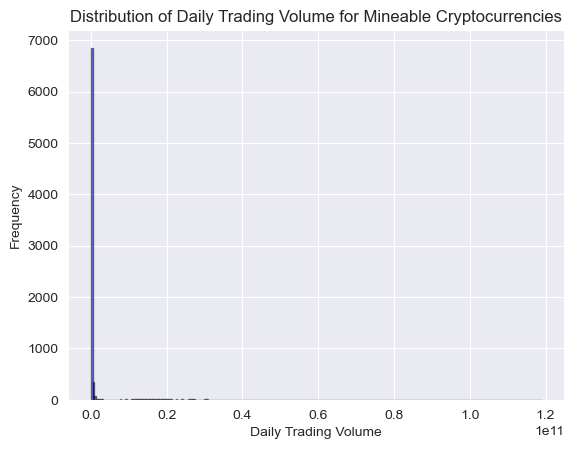

In [193]:
plt.hist(volume_data, bins=250, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Daily Trading Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Trading Volume for Mineable Cryptocurrencies')
plt.grid(True)
plt.show()

In [30]:
volume_data2 = pd.Series(volume_data)
volume_data2 = volume_data2[volume_data2 < 100000000]
volume_data2

0        6744198.80
1       11037057.78
2        7596591.60
3       12721846.75
4        7677163.36
           ...     
7671    56575703.85
7672    59656282.98
7681    72999569.79
7682    52849221.42
7683    46434392.47
Length: 5254, dtype: float64

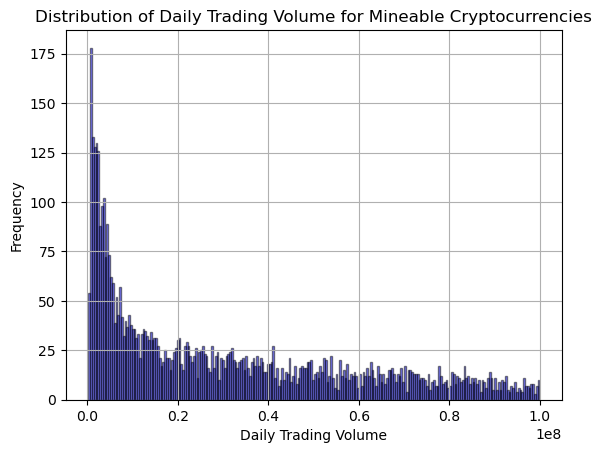

In [31]:
plt.hist(volume_data2, bins=250, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Daily Trading Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Trading Volume for Mineable Cryptocurrencies')
plt.grid(True)
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سوال ۴
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریس هم‌بستگی را برای تغییرات قیمت ۱۶ رمزارز برتر از نظر ارزش بازار رسم نمایید. 
</font>
</p>

In [100]:
#sum_coins = pd.read_csv('Top200Main.csv')
sum_coins = testDf
#sum_coins.head()

In [63]:
top16_coins_names = sum_coins['Name'][:16]
#print(top16_coins_names)
top16_coins_dif = pd.DataFrame()

In [64]:
for coin in coins:
    CName = coin['Name'][0]
    if(CName in list(top16_coins_names)):
        dif = coin['close'] - coin['open']
        top16_coins_dif[CName] = dif

<Axes: >

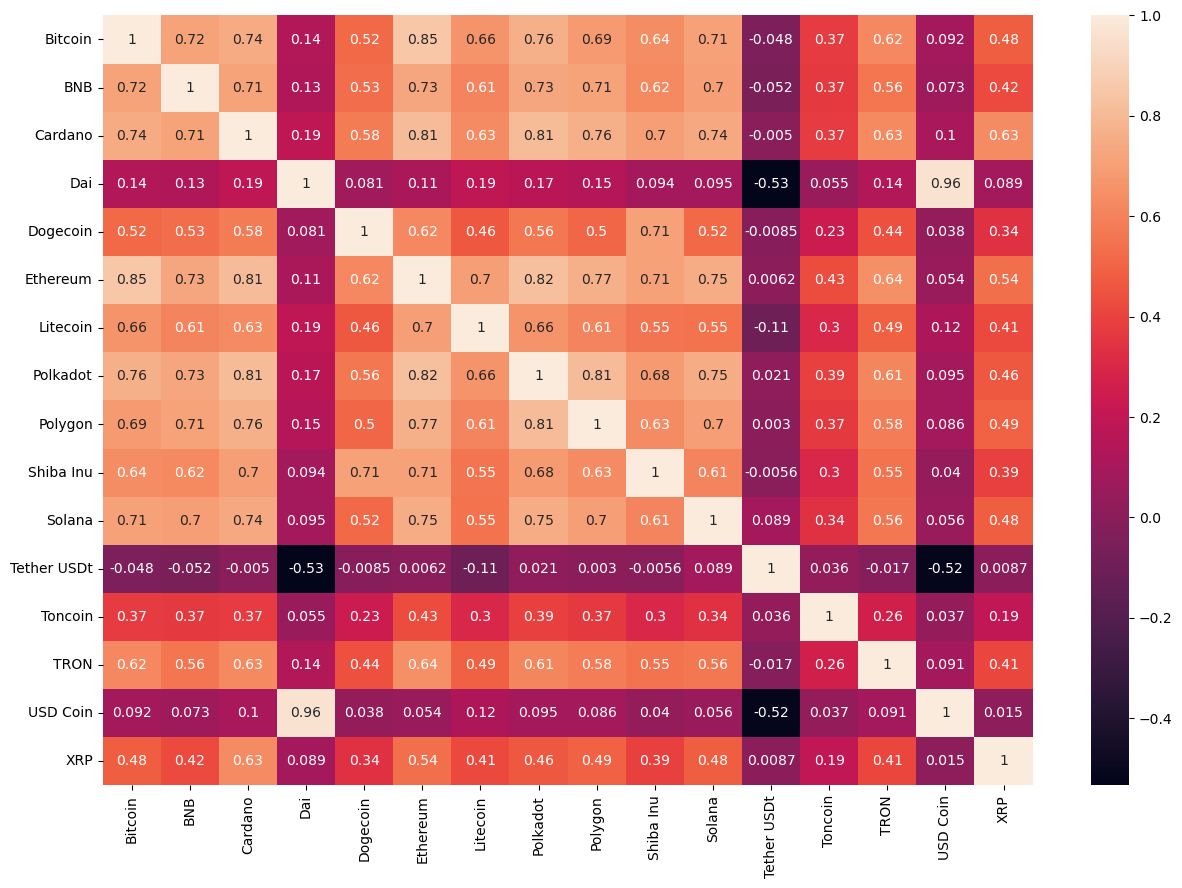

In [65]:
corr = top16_coins_dif.corr()
fix, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax, annot=True)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سوال ۵
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
روزهایی که بیش از ۳۵ درصد رمزارزهای مورد مطالعه افزایش قیمت (تفاوت close و open روز) را تجربه می‌کنند روزهای سبز و دیگر روزها را روزهای قرمز بازار می‌نامیم. ۱۰ رمزارز که بیش‌ترین تعداد افزایش قیمت را در روز‌های قرمز در بهار ۲۰۲۳ (برج‌های ۳، ۴ و ۵ میلادی) تجربه کرده‌اند کدام رمز‌ارز‌ها هستند؟ حجم بازار‌ این ۱۰ رمز‌ارز‌ را به صورت نمودار میله‌ای نمایش دهید. 
</font>
</p>

In [169]:
meta = MetaData()

CombinedCSV = Table(
    'CombinedCSV',
    meta,
    Column('name', String(255), primary_key=True),
    Column('time_open', String(255)),
    Column('time_close', String(255)),
    Column('time_high', String(255)),
    Column('time_low', String(255)),
    Column('open', Float),
    Column('high', Float),
    Column('low', Float),
    Column('close', Float),
    Column('volume', Float),
    Column('market_cap', Float),
    Column('timestamp', String(255))
)

Session = sessionmaker(bind=engine)
session = Session()


In [170]:
start_date = '2023-03-01'
end_date = '2023-05-31'

spring_data = (
    session.query(CombinedCSV.c.name, CombinedCSV.c.timestamp, CombinedCSV.c.close, CombinedCSV.c.open, CombinedCSV.c.volume)
    .filter(CombinedCSV.c.timestamp >= start_date, CombinedCSV.c.timestamp <= end_date)
    .all()
)
df = pd.DataFrame(spring_data, columns=['name', 'timestamp', 'close', 'open', 'volume'])

df['percentage_change'] = ((df['close'] - df['open']) / df['open']) * 100

red_market_days = df.groupby('timestamp')['percentage_change'].apply(lambda x: (x > 0).mean() < 0.35)

red_days_count = df[df['timestamp'].isin(red_market_days[red_market_days].index)].groupby('name').size()

top_10_red_days = red_days_count.nlargest(10).index

top_10_market_volumes = df[df['name'].isin(top_10_red_days)].groupby('name')['volume'].sum()

2023-09-11 20:03:40,940 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-11 20:03:40,950 INFO sqlalchemy.engine.Engine SELECT `CombinedCSV`.name AS `CombinedCSV_name`, `CombinedCSV`.timestamp AS `CombinedCSV_timestamp`, `CombinedCSV`.close AS `CombinedCSV_close`, `CombinedCSV`.open AS `CombinedCSV_open`, `CombinedCSV`.volume AS `CombinedCSV_volume` 
FROM `CombinedCSV` 
WHERE `CombinedCSV`.timestamp >= %(timestamp_1)s AND `CombinedCSV`.timestamp <= %(timestamp_2)s
2023-09-11 20:03:40,950 INFO sqlalchemy.engine.Engine [generated in 0.00149s] {'timestamp_1': '2023-03-01', 'timestamp_2': '2023-05-31'}


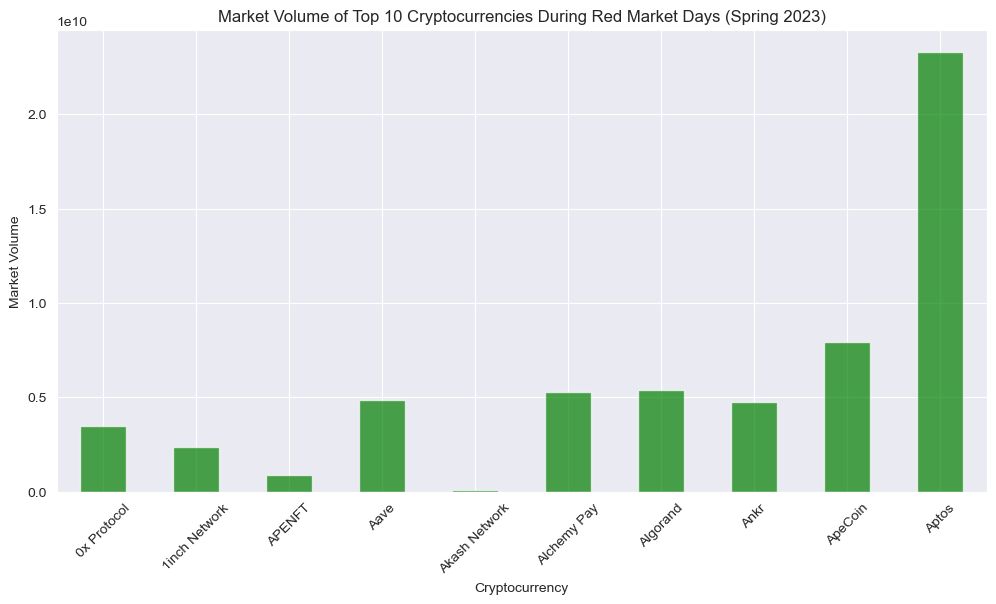

In [173]:
plt.figure(figsize=(12, 6))
top_10_market_volumes.plot(kind='bar', color='green', alpha=0.7)
plt.title('Market Volume of Top 10 Cryptocurrencies During Red Market Days (Spring 2023)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Market Volume')
plt.xticks(rotation=45)
plt.show()

<h2 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تخمین
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به‌صورت تصادفی ۴۰ رمز ارز را از میان داده‌های استخراج شده انتخاب نمایید و میانگین حجم معاملاتی روزانه هر یک را به‌دست آورید. طبق این نمونه برداری بازه‌ی اطمینان ۹۸ درصد را برای حجم معاملاتی محاسبه نمایید.
</font>
</p>

In [214]:
meta = MetaData()

csv4 = Table(
    'CombinedCSV',
    meta,
    Column('name', String(255), primary_key=True),
    Column('time_open', String(255)),
    Column('time_close', String(255)),
    Column('time_high', String(255)),
    Column('time_low', String(255)),
    Column('open', Float),
    Column('high', Float),
    Column('low', Float),
    Column('close', Float),
    Column('volume', Float),
    Column('market_cap', Float),
    Column('timestamp', String(255))
)

Session = sessionmaker(bind=engine)
session = Session()

In [219]:
query = session.query(CombinedCSV.c.name, CombinedCSV.c.volume)
result = query.all()
data = pd.DataFrame(result, columns=['name', 'volume'])

data = data.sort_values(by='volume')

2023-09-11 10:42:35,942 INFO sqlalchemy.engine.Engine SELECT `CombinedCSV`.name AS `CombinedCSV_name`, `CombinedCSV`.volume AS `CombinedCSV_volume` 
FROM `CombinedCSV`
2023-09-11 10:42:35,943 INFO sqlalchemy.engine.Engine [generated in 0.00491s] {}


In [220]:
def remove_outliers(data, column, threshold=1.5):
    q75, q25 = np.percentile(data[column], [75 ,25])
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [222]:
df_cleaned = remove_outliers(data, 'volume')

selected_names = random.sample(df_cleaned['name'].tolist(), 40)

means = []
for name in selected_names:
    name_mean = (
        session.query(func.avg(CombinedCSV.c.volume).label('mean_volume'))
        .filter(CombinedCSV.c.name == name)
        .first()
    )
    means.append(name_mean.mean_volume)


2023-09-11 10:43:52,421 INFO sqlalchemy.engine.Engine SELECT avg(`CombinedCSV`.volume) AS mean_volume 
FROM `CombinedCSV` 
WHERE `CombinedCSV`.name = %(name_1)s 
 LIMIT %(param_1)s
2023-09-11 10:43:52,421 INFO sqlalchemy.engine.Engine [generated in 0.00071s] {'name_1': 'Arweave', 'param_1': 1}
2023-09-11 10:43:52,466 INFO sqlalchemy.engine.Engine SELECT avg(`CombinedCSV`.volume) AS mean_volume 
FROM `CombinedCSV` 
WHERE `CombinedCSV`.name = %(name_1)s 
 LIMIT %(param_1)s
2023-09-11 10:43:52,466 INFO sqlalchemy.engine.Engine [cached since 0.04585s ago] {'name_1': 'Dash', 'param_1': 1}
2023-09-11 10:43:52,497 INFO sqlalchemy.engine.Engine SELECT avg(`CombinedCSV`.volume) AS mean_volume 
FROM `CombinedCSV` 
WHERE `CombinedCSV`.name = %(name_1)s 
 LIMIT %(param_1)s
2023-09-11 10:43:52,497 INFO sqlalchemy.engine.Engine [cached since 0.07658s ago] {'name_1': 'Stargate Finance', 'param_1': 1}
2023-09-11 10:43:52,522 INFO sqlalchemy.engine.Engine SELECT avg(`CombinedCSV`.volume) AS mean_volume

In [223]:
overall_mean = np.mean(means)

standard_error = np.std(means) / np.sqrt(len(means))
confidence_level = 0.98

z_score = stats.norm.ppf((1 + confidence_level) / 2)

margin_of_error = z_score * standard_error

confidence_interval = (overall_mean - margin_of_error, overall_mean + margin_of_error)

for i, name in enumerate(selected_names):
    print(f"Name {i + 1}: {name} - Mean Volume: {means[i]}")

print(f"Overall Mean of Means: {overall_mean}")
print(f"98% Confidence Interval for Trading Volume: {confidence_interval}")

Name 1: Arweave - Mean Volume: 22035674.53021977
Name 2: Dash - Mean Volume: 73749513.18846157
Name 3: Stargate Finance - Mean Volume: 26005357.68156593
Name 4: TrueUSD - Mean Volume: 802642762.982802
Name 5: Osmosis - Mean Volume: 12022034.690934066
Name 6: Osmosis - Mean Volume: 12022034.690934066
Name 7: Ocean Protocol - Mean Volume: 27734370.190741763
Name 8: Fetch.ai - Mean Volume: 52159402.77978024
Name 9: Gala - Mean Volume: 141368595.84923074
Name 10: Lido DAO - Mean Volume: 87595129.16013743
Name 11: Galxe - Mean Volume: 20741623.1298077
Name 12: Synthetix - Mean Volume: 48727435.52063185
Name 13: GMX - Mean Volume: 28596386.065219793
Name 14: The Graph - Mean Volume: 55055944.224752754
Name 15: Bone ShibaSwap - Mean Volume: 9304986.441620875
Name 16: Zcash - Mean Volume: 41929469.98796703
Name 17: Livepeer - Mean Volume: 13197406.875851652
Name 18: VeChain - Mean Volume: 49270870.36914835
Name 19: Aragon - Mean Volume: 12745041.069038464
Name 20: Bone ShibaSwap - Mean Volume:

<h2 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آزمون فرض
</font>
</h2>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آزمون فرض اول
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
شرکت کوئرا شغل پاره‌وقتی را به شما پیشنهاد داده و ۲ حق انتخاب برای روزهای کاری به شما داده است. انتخاب اول، روزهای چهارشنبه تا شنبه و انتخاب دوم روزهای یکشنبه تا چهارشنبه می‌باشد. از آن‌جا که شما علاوه بر فعالیت‌های کاری در حوزه‌ی تخصصی خود، به خرید و فروش رمز ارز نیز مشغول هستید، تصمیم می‌گیرید یک مطالعه‌ی آماری بر روند بازار رمزارزها داشته باشید تا روزهای پویا و متلاطم‌تر بازار را از دست ندهید. بدین منظور می‌خواهید میانگین میزان تغییر قیمت رمزارز‌ها در روزهای پنج‌شنبه، جمعه و شنبه را با روزهای یکشنبه، دوشنبه و سه‌شنبه مقایسه کنید. آیا با این شاخص انتخاب شده، تفاوت فاحشی میان دو انتخاب ممکن برای روزهای کاری وجود دارد؟ در صورت مثبت بودن پاسخ، انتخاب شما چه روز‌هایی است؟
</font>
</p>

In [148]:
#coins['timestamp'] = coins['timestamp'].apply(pd.to_datetime)
weekday_difs = np.zeros(0)
offday_difs = np.zeros(0)
print(weekday_difs.shape)
for coin in coins:
    days = coin['timestamp'].apply(pd.to_datetime).dt.day_name()
    days_week = days.isin(['Sunday','Monday','Tuesday'])
    days_off = days.isin(['Thursday', 'Friday', 'Saturday'])
    dif = coin['close'] - coin['open']
    weekdays = dif.loc[days_week]
    offdays = dif.loc[days_off]
    weekday_difs = np.append(weekday_difs, np.array(weekdays))
    offday_difs = np.append(offday_difs, np.array(offdays))

(0,)


In [149]:
#weekday_difs = np.array(weekday_difs, dtype=object)
print(weekday_difs.shape, offday_difs.shape)

(29746,) (29759,)


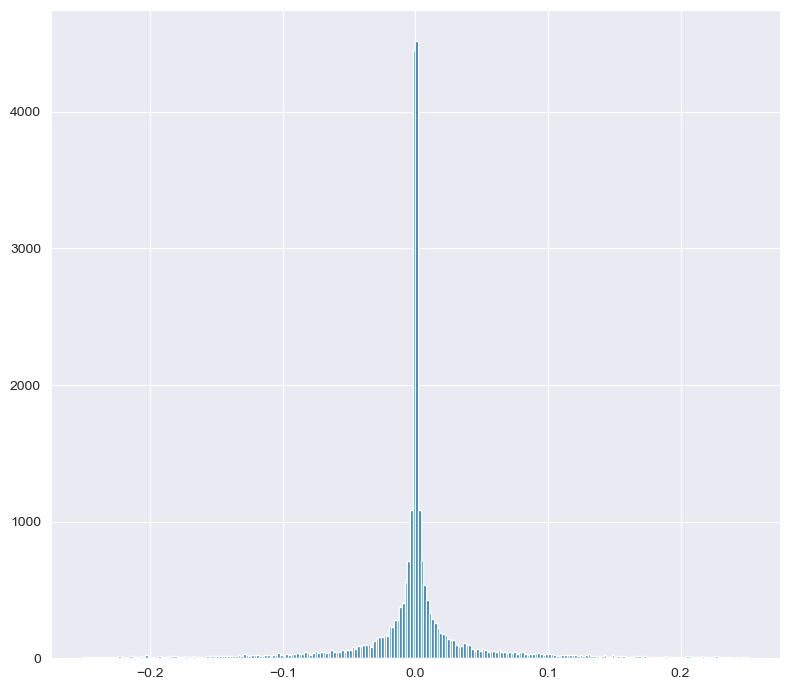

In [164]:
fig , ax = plt.subplots(figsize= (8, 7))
ax.hist(offday_difs, range=(-0.25,0.25), bins=250)
fig.tight_layout()

In [77]:
min_days = min(weekday_difs.shape[0], offday_difs.shape[0])
ttest_week = np.random.choice(weekday_difs, min_days)
ttest_off = np.random.choice(offday_difs, min_days)

In [179]:
t_stat, p_value = stats.ttest_rel(ttest_week, ttest_off, alternative='two-sided')
print("t statistics = ",t_stat)
print("p-value = ", p_value)
if p_value > 0.05:
    print("They are NOT significantly different")
else:
    print("They are significantly different")

t statistics =  2.0759954981193514
p-value =  0.03790293626438201
They are Not significantly different


In [182]:
t_stat, p_value = stats.ttest_rel(ttest_week, ttest_off, alternative='less')
print("t statistics = ",t_stat)
print("p-value = ", p_value)
if p_value < 0.05:
    print("They are significantly different and ttest_week < ttest_off")

t statistics =  2.0759954981193514
p-value =  0.9810485318678089


In [184]:
t_stat, p_value = stats.ttest_rel(ttest_week, ttest_off, alternative='greater')
print("t statistics = ",t_stat)
print("p-value = ", p_value)
if p_value < 0.05:
    print("They are significantly different and ttest_week > ttest_off")

t statistics =  2.0759954981193514
p-value =  0.018951468132191004
They are significantly different and ttest_week > ttest_off


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آزمون فرض دوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
معمولاً افرادی که تازه وارد بازار رمزارز می‌شوند، مایل به سرمایه‌‌گذاری در رمزارزهای بسیار معروف هستند و از طرفی دیگر برخی افراد ریسک‌پذیری پایینی دارند و تمایل دارند در رمزارزهایی با تغییرات کم‌تر نسبت به دیگر رمزارزها سرمایه‌گذاری کنند، لذا به نظر می‌رسد بیشتر معاملات بازار بین معروف‌ترین و باثبات‌ترین رمزارزهای بازار باشد. اکنون می‌خواهیم بررسی کنیم که چه میزان از معاملات روزانه بازار مربوط به این رمزارزهاست. برای این کار سه رمز ارز 'Bitcoin', 'Ethereum', 'Tether USDt' را در نظر بگیرید و بررسی کنید آیا این ادعای زیر صحیح است یا نه؟
"میانگین حجم معاملات روزانه‌ی  'Bitcoin' ،'Ethereum' و  'Tether USDt'  به‌شدت بیشتر از میانگین حجم معاملات روزانه باقی رمزارزهاست."

</font>
</p>

In [224]:
meta = MetaData()

csv4 = Table(
    'CombinedCSV',
    meta,
    Column('name', String(255), primary_key=True),
    Column('time_open', String(255)),
    Column('time_close', String(255)),
    Column('time_high', String(255)),
    Column('time_low', String(255)),
    Column('open', Float),
    Column('high', Float),
    Column('low', Float),
    Column('close', Float),
    Column('volume', Float),
    Column('market_cap', Float),
    Column('timestamp', String(255))
)

Session = sessionmaker(bind=engine)
session = Session()


In [225]:
bitcoin_volume = (
    session.query(func.avg(CombinedCSV.c.volume).label('avg_volume'))
    .filter(CombinedCSV.c.name == 'Bitcoin')
    .first()
).avg_volume

ethereum_volume = (
    session.query(func.avg(CombinedCSV.c.volume).label('avg_volume'))
    .filter(CombinedCSV.c.name == 'Ethereum')
    .first()
).avg_volume

tether_volume = (
    session.query(func.avg(CombinedCSV.c.volume).label('avg_volume'))
    .filter(CombinedCSV.c.name == 'Tether USDt')
    .first()
).avg_volume

other_cryptos_volume = (
    session.query(func.avg(CombinedCSV.c.volume).label('avg_volume'))
    .filter(CombinedCSV.c.name.notin_(['Bitcoin', 'Ethereum', 'Tether USDt']))
    .first()
).avg_volume

print(bitcoin_volume)
print(ethereum_volume)
print(tether_volume)
print(other_cryptos_volume)

2023-09-11 10:49:06,585 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-11 10:49:06,588 INFO sqlalchemy.engine.Engine SELECT avg(`CombinedCSV`.volume) AS avg_volume 
FROM `CombinedCSV` 
WHERE `CombinedCSV`.name = %(name_1)s 
 LIMIT %(param_1)s
2023-09-11 10:49:06,588 INFO sqlalchemy.engine.Engine [generated in 0.00043s] {'name_1': 'Bitcoin', 'param_1': 1}
2023-09-11 10:49:06,661 INFO sqlalchemy.engine.Engine SELECT avg(`CombinedCSV`.volume) AS avg_volume 
FROM `CombinedCSV` 
WHERE `CombinedCSV`.name = %(name_1)s 
 LIMIT %(param_1)s
2023-09-11 10:49:06,662 INFO sqlalchemy.engine.Engine [cached since 0.07432s ago] {'name_1': 'Ethereum', 'param_1': 1}
2023-09-11 10:49:06,684 INFO sqlalchemy.engine.Engine SELECT avg(`CombinedCSV`.volume) AS avg_volume 
FROM `CombinedCSV` 
WHERE `CombinedCSV`.name = %(name_1)s 
 LIMIT %(param_1)s
2023-09-11 10:49:06,684 INFO sqlalchemy.engine.Engine [cached since 0.09645s ago] {'name_1': 'Tether USDt', 'param_1': 1}
2023-09-11 10:49:06,708 INFO sqlal

In [227]:
if bitcoin_volume > other_cryptos_volume and ethereum_volume > other_cryptos_volume and tether_volume > other_cryptos_volume:
    print("The above claim is CORRECT")
else:
    print("The above claim is INCORRECT")

The above claim is CORRECT


<h2 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سوال امتیازی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نوید ادعا می‌کند تغییر قیمت رمز‌ارزها در روزهای تعطیل از یک توزیع نرمال پیروی می‌کند. بررسی کنید این ادعا تا چه اندازه صحیح است. بدین منظور نخست هیستوگرام تغییر قیمت روزانه رمز‌ارزها در روز‌های تعطیل (شنبه و یکشنبه) را رسم نمایید. سپس از آزمون آماری متناسب با مسئله استفاده کرده و نظر خود را در رابطه با این ادعا بیان کنید.

</font>
</p>

In [48]:
meta = MetaData()

CombinedCSV = Table(
    'CombinedCSV',
    meta,
    Column('name', String(255), primary_key=True),
    Column('timestamp', String(255)),
    Column('open', Float),
    Column('close', Float),
)

Session = sessionmaker(bind=engine)
session = Session()

In [49]:
HolidayPriceChanges = (
    session.query(CombinedCSV.c.close - CombinedCSV.c.open).filter(func.dayofweek(CombinedCSV.c.timestamp) >= 6).all()
)

PriceChanges = [change[0] for change in HolidayPriceChanges]
#print(len(PriceChanges))

2023-09-11 18:17:31,909 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-09-11 18:17:31,910 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 18:17:31,925 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-09-11 18:17:31,925 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 18:17:31,927 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-09-11 18:17:31,928 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-09-11 18:17:31,935 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-11 18:17:31,937 INFO sqlalchemy.engine.Engine SELECT `CombinedCSV`.close - `CombinedCSV`.open AS anon_1 
FROM `CombinedCSV` 
WHERE dayofweek(`CombinedCSV`.timestamp) >= %(dayofweek_1)s
2023-09-11 18:17:31,938 INFO sqlalchemy.engine.Engine [generated in 0.00075s] {'dayofweek_1': 6}
19835


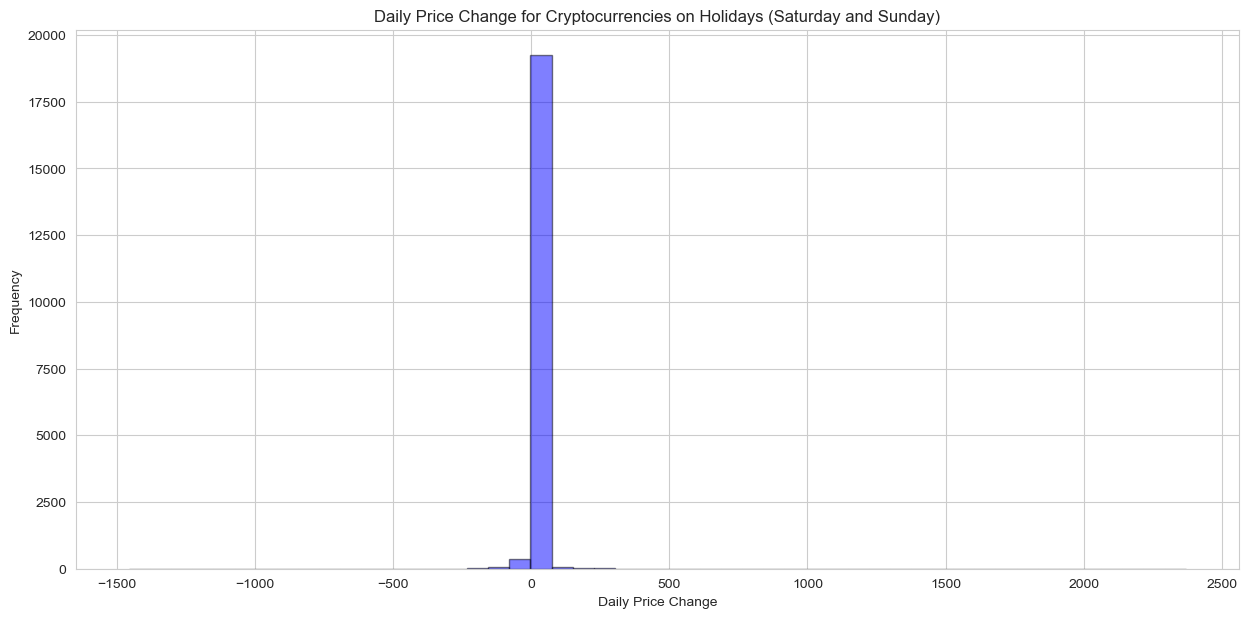

In [50]:
fig , ax = plt.subplots(figsize= (15, 7))
ax.hist(PriceChanges, bins=50, alpha=0.5, color='blue', edgecolor='black')
ax.set_xlabel('Daily Price Change')
ax.set_ylabel('Frequency')
ax.set_title('Daily Price Change for Cryptocurrencies on Holidays (Saturday and Sunday)')
plt.show()

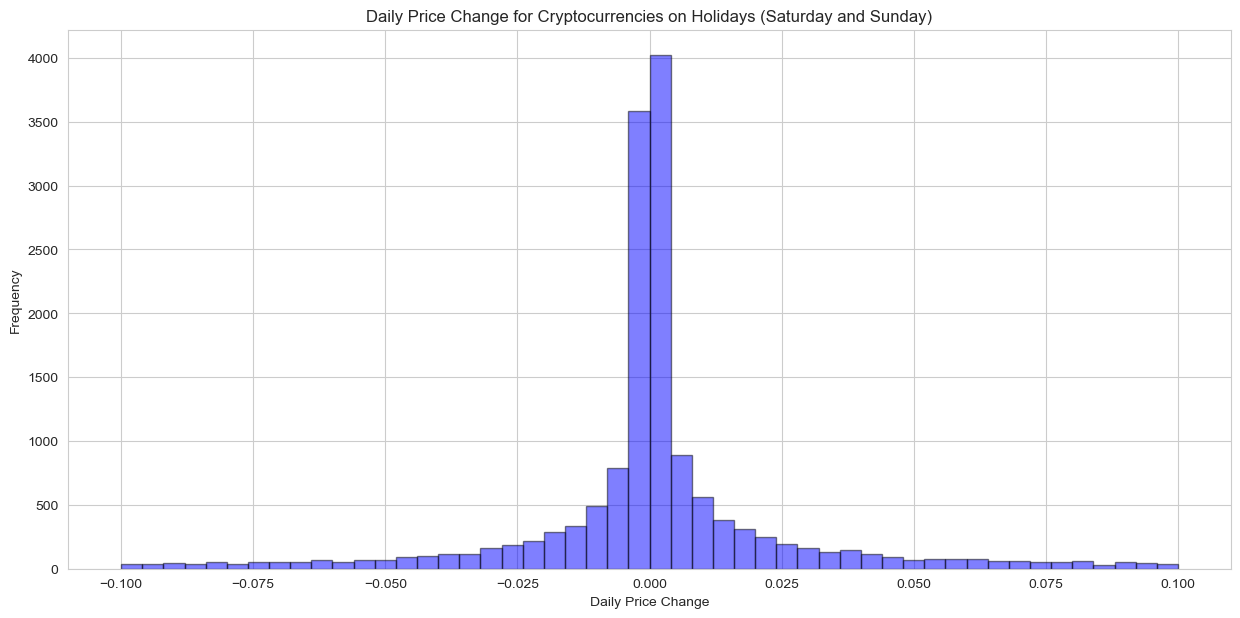

In [51]:
fig , ax = plt.subplots(figsize= (15, 7))
ax.hist(PriceChanges, bins=50,range = (-0.1, 0.1), alpha=0.5, color='blue', edgecolor='black')
ax.set_xlabel('Daily Price Change')
ax.set_ylabel('Frequency')
ax.set_title('Daily Price Change for Cryptocurrencies on Holidays (Saturday and Sunday)')
plt.show()

In [141]:
N = 5000
sample = random.sample(PriceChanges, N)

In [142]:
# Performing the Shapiro-Wilk normality test

stat, p = stats.shapiro(sample)
print('p_value: ', p)
if p > 0.05:
    print("The data follows a normal distribution (p > 0.05). Navid's claim may be true.")
else:
    print("The data does not follow a normal distribution (p <= 0.05). Navid's claim may not be true.")

p_value:  0.0
The data does not follow a normal distribution (p <= 0.05). Navid's claim may not be true.


In [146]:
#normal test
statistic, pvalue = stats.normaltest(PriceChanges)
if pvalue > 0.05:
    print("The data follows a normal distribution (p > 0.05). Navid's claim may be true.")
else:
    print("The data does not follow a normal distribution (p <= 0.05). Navid's claim may not be true.")

The data does not follow a normal distribution (p <= 0.05). Navid's claim may not be true.
